In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Project_updated_trial.csv")

In [5]:
df.head()

,S.No,C-1,Initial C-1,Final C-1,Removal-C-1,Initial pH,Current,Electrode Gap,Current Density,Residence Time,Reactor Volume,Electrode Material,Batch/Continuous,Electrode Area,Reference No.
0,1,As,0.042,0.04200,0.0,3.0,0.441,1.0,45.0,15.0,1500,Al,batch,98.0,1
1,2,As,0.042,0.00126,97.0,5.0,0.441,1.0,45.0,15.0,1500,Al,batch,98.0,1
2,3,As,0.042,0.00126,97.0,5.0,0.441,1.0,45.0,15.0,1500,Fe,batch,98.0,1
3,4,As,0.042,0.00084,98.0,3.0,2.597,1.0,45.0,15.0,1500,Al-Fe,batch,577.2,1
4,5,As,0.042,0.00084,98.0,5.0,2.597,1.0,45.0,15.0,1500,Al-Fe,batch,577.2,1


In [6]:
df.shape

(371, 15)

In [7]:
df.rename(columns = {
    "C-1" : "Contaminant",
    "Initial C-1" : "Initial Concentration",
    "Final C-1" : "Final Concentration",
    "Removal C-1" : "Percentage Removal"
}, inplace = True)
df.head()

,S.No,Contaminant,Initial Concentration,Final Concentration,Removal-C-1,Initial pH,Current,Electrode Gap,Current Density,Residence Time,Reactor Volume,Electrode Material,Batch/Continuous,Electrode Area,Reference No.
0,1,As,0.042,0.04200,0.0,3.0,0.441,1.0,45.0,15.0,1500,Al,batch,98.0,1
1,2,As,0.042,0.00126,97.0,5.0,0.441,1.0,45.0,15.0,1500,Al,batch,98.0,1
2,3,As,0.042,0.00126,97.0,5.0,0.441,1.0,45.0,15.0,1500,Fe,batch,98.0,1
3,4,As,0.042,0.00084,98.0,3.0,2.597,1.0,45.0,15.0,1500,Al-Fe,batch,577.2,1
4,5,As,0.042,0.00084,98.0,5.0,2.597,1.0,45.0,15.0,1500,Al-Fe,batch,577.2,1


# <u>A brief description about the data</u>

### This is a data about the process of arsenic and fluoride removal from synthetic and real groundwater by electrocoagulation process. 
### **`Electrocoagulation (EC)`** is an effective water treatment process for removing contaminants such as arsenic and fluoride from groundwater. The process involves the use of electrical current to dissolve metal electrodes, typically iron or aluminum, which release ions into the water. These ions react with the contaminants, forming insoluble compounds that can be easily separated from the water.

# <u>A brief description about the columns in the data:</u>
- `Contaminant` It is the element that needs to be removed during the process of electrocoagulation.
- `Initial Concentration` It is the initial concentration (in mg/L) of the contaminant in the sample taken.
- `Final Concentration` It is the final concentration (in mg/L) of the contaminant in the sample taken.
- `Percentage Removal` It is the percentage of the contaminant removed during the process.
- `Initial pH` These are the values of the pH of the solution during the begining of the process.
- `Current` It is the current passed through electrodes.
- `Electrode Gap` It is the perpendicular distance between single electrodes (in cm).
- `Current Density` It is defined as the ratio of current to electrode area (in A/$m^2$).
- `Residence Time` It is the time taken by the process to complete.
- `Reactor Volume` It is the volume of the reactor or the beaker in which reaction is carried out (in mL).
- `Electrode Material` It is the type of electrode used.
- `Batch/Continous` The type of electrocoagulation process.
- `Electrode Area` The effective surface area per each electrode (in $cm^2$). 

# <u>Our Objective</u>
### The main goal of our model is to predict the values of the current and residence time, given Initial conc, Final conc, Initial pH, Electrode gap, Reactor Volume and Electrode Area

# 

# <u>Addressing the issues with the data and proposing a suitable solution</u>

## **1) Dropping the columns that are not useful**
### Columns like S.no, Ref No. are not necessary.
### %removal and Current Density are dependent columns and will result in multi colinearity problem. But let's just hold for a bit
### So dropping :- S.No, Reference No.

In [18]:
df.drop(columns = ["S.No", "Reference No."], inplace = True)

In [19]:
# Percentage of missing values in each column
100*df.isnull().sum()/len(df)

Contaminant               0.000000
Initial Concentration     0.000000
Final Concentration       0.000000
Removal-C-1               0.000000
Initial pH               11.320755
Current                   0.000000
Electrode Gap             2.156334
Current Density           0.000000
Residence Time            0.000000
Reactor Volume            0.000000
Electrode Material        0.000000
Batch/Continuous          0.000000
Electrode Area            0.000000
dtype: float64

---

## **2) Checking the correlation of features**

In [24]:
df.describe()

,Initial Concentration,Final Concentration,Removal-C-1,Initial pH,Current,Electrode Gap,Current Density,Residence Time,Reactor Volume,Electrode Area
count,371.000000,371.000000,371.000000,329.000000,371.000000,363.000000,371.000000,371.000000,371.000000,371.000000
mean,4.274191,1.650506,74.521294,6.788298,1.340344,1.768044,61.369576,32.492992,1107.816712,254.465768
std,4.557592,2.711514,28.370839,1.590246,1.756545,1.421043,81.767844,35.003498,699.189360,191.167275
min,0.015900,0.000010,0.000000,1.000000,0.017000,0.500000,0.800000,1.000000,250.000000,36.250000
25%,0.162500,0.011620,67.330000,6.000000,0.100000,1.000000,7.500000,10.000000,650.000000,100.000000
50%,1.420000,0.290000,85.500000,7.000000,0.468750,1.500000,17.500000,20.000000,1000.000000,219.000000
75%,10.000000,1.823054,95.060000,7.400000,2.000000,2.000000,100.000000,48.750000,1400.000000,250.000000
max,17.000000,10.030000,99.980000,11.000000,8.400000,10.000000,300.000000,180.000000,5000.000000,840.000000


In [25]:
df_numerical = df[df.describe().columns]
corr_matrix = df_numerical.corr()

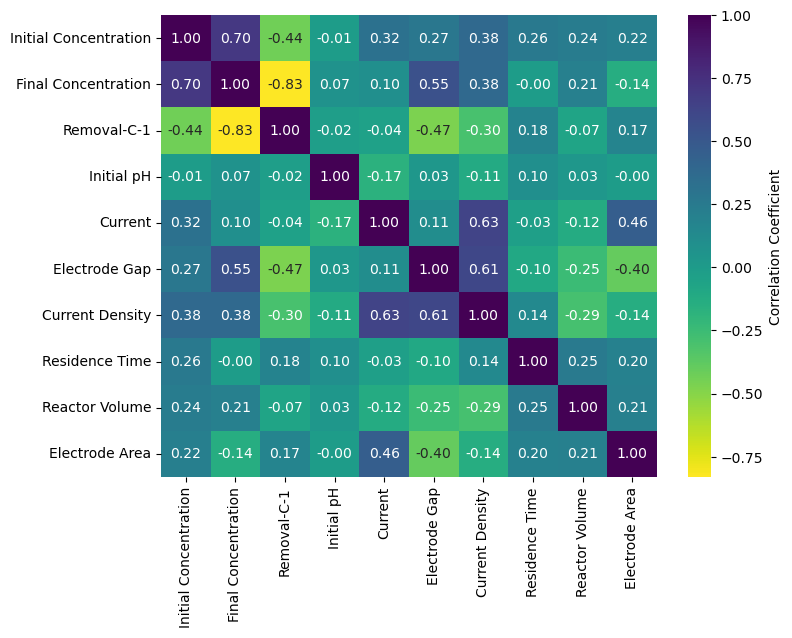

In [26]:
plt.figure(figsize = (8,6))
sns.heatmap(corr_matrix, 
            cmap="viridis_r",  # Reverse the 'viridis' colormap
            annot=True,        # Display the correlation values
            fmt=".2f",         # Format the correlation values to two decimal places
            cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={"size": 10})  # Add a label to the colorbar

plt.savefig("heatmap.jpg")
plt.show()

In [27]:
corr_matrix[corr_matrix > 0.25]

,Initial Concentration,Final Concentration,Removal-C-1,Initial pH,Current,Electrode Gap,Current Density,Residence Time,Reactor Volume,Electrode Area
Initial Concentration,1.000000,0.700408,NaN,NaN,0.315866,0.273296,0.381005,0.256648,NaN,NaN
Final Concentration,0.700408,1.000000,NaN,NaN,NaN,0.546375,0.383816,NaN,NaN,NaN
Removal-C-1,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Initial pH,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Current,0.315866,NaN,NaN,NaN,1.000000,NaN,0.632319,NaN,NaN,0.460258
Electrode Gap,0.273296,0.546375,NaN,NaN,NaN,1.000000,0.609681,NaN,NaN,NaN
Current Density,0.381005,0.383816,NaN,NaN,0.632319,0.609681,1.000000,NaN,NaN,NaN
Residence Time,0.256648,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.251405,NaN
Reactor Volume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.251405,1.000000,NaN
Electrode Area,NaN,NaN,NaN,NaN,0.460258,NaN,NaN,NaN,NaN,1.000000


In [28]:
corr_matrix[corr_matrix < -.25]

,Initial Concentration,Final Concentration,Removal-C-1,Initial pH,Current,Electrode Gap,Current Density,Residence Time,Reactor Volume,Electrode Area
Initial Concentration,NaN,NaN,-0.435424,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final Concentration,NaN,NaN,-0.830934,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Removal-C-1,-0.435424,-0.830934,NaN,NaN,NaN,-0.466188,-0.297279,NaN,NaN,NaN
Initial pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Electrode Gap,NaN,NaN,-0.466188,NaN,NaN,NaN,NaN,NaN,NaN,-0.399674
Current Density,NaN,NaN,-0.297279,NaN,NaN,NaN,NaN,NaN,-0.288862,NaN
Residence Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Reactor Volume,NaN,NaN,NaN,NaN,NaN,NaN,-0.288862,NaN,NaN,NaN
Electrode Area,NaN,NaN,NaN,NaN,NaN,-0.399674,NaN,NaN,NaN,NaN


## Results :

### Most of the features have good amount of correlation and thus it would be more clear when we plot the graphs between them.

---

## **3) Handling the missing values**

In [35]:
100*df.isnull().sum()/len(df)

Contaminant               0.000000
Initial Concentration     0.000000
Final Concentration       0.000000
Removal-C-1               0.000000
Initial pH               11.320755
Current                   0.000000
Electrode Gap             2.156334
Current Density           0.000000
Residence Time            0.000000
Reactor Volume            0.000000
Electrode Material        0.000000
Batch/Continuous          0.000000
Electrode Area            0.000000
dtype: float64

### As we can see, only 2 columns have missing values, Initial pH and Electrode Gap. 
### Filling them with 7 and 1 respectively:

In [37]:
# checking the mean and median of both the columns
print(df["Initial pH"].mean())
print(df["Electrode Gap"].mean())
print()
print(df["Initial pH"].median())
print(df["Electrode Gap"].median())

6.788297872340427
1.7680440771349861

7.0
1.5


In [38]:
# It is safe to do so
df["Initial pH"] = df["Initial pH"].fillna(7)
df["Electrode Gap"] = df["Electrode Gap"].fillna(1)

In [39]:
df.isnull().sum()

Contaminant              0
Initial Concentration    0
Final Concentration      0
Removal-C-1              0
Initial pH               0
Current                  0
Electrode Gap            0
Current Density          0
Residence Time           0
Reactor Volume           0
Electrode Material       0
Batch/Continuous         0
Electrode Area           0
dtype: int64

---

## **4) Handling categorical data**

### There are few problems in the data regarding the categorical columns(Contamninant, Batch/Continuous and Electrode material):
- There are different values in electrode material column that signify same thing (for ex: Al and al represent Aluminium)
- Similar thing with Batch/Continuous : batch and Batch signify batch electrocoagulation

In [43]:
electrode_material = []
for i in df["Electrode Material"]:
    if(i == "Al" or i == "Al-Al" or i == "al"):
        electrode_material.append("Al")
    elif(i == "Fe" or i == "Fe-Fe" or i == "Fe "):
        electrode_material.append("Fe")
    elif(i == "Fe-Al" or i == "Al-Fe"):
        electrode_material.append("Fe-Al")
    else:
        electrode_material.append(i)
df["Electrode Material"] = electrode_material
b_c = []
for i in df["Batch/Continuous"]:
    if(i == "batch" or i == "Batch"):
        b_c.append("Batch")
    else:
        b_c.append("Continuous")
df["Batch/Continuous"] = b_c

In [44]:
df["Electrode Material"].unique()

array(['Al', 'Fe', 'Fe-Al'], dtype=object)

In [45]:
sum(df["Batch/Continuous"] == "Batch")/len(df)

0.9892183288409704

### As the count of Batch is way too high, dropping this column!

In [47]:
df.drop(columns = ["Batch/Continuous"], inplace = True)

---

## **5) Performing Univariate Analysis**

## A) Contaminant

In [51]:
df["Initial Concentration"].describe()

count    371.000000
mean       4.274191
std        4.557592
min        0.015900
25%        0.162500
50%        1.420000
75%       10.000000
max       17.000000
Name: Initial Concentration, dtype: float64

<Axes: xlabel='Initial Concentration', ylabel='Count'>

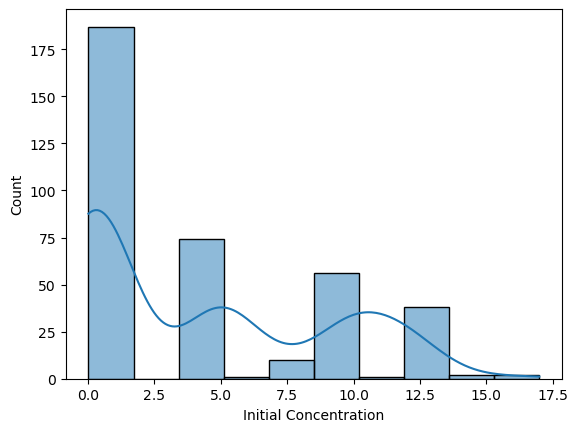

In [52]:
sns.histplot(df["Initial Concentration"],kde=True)

### As we can see, most of the values of the data are near zero, then there is a bump near 5 and then 10. So our data is trimodal and thus we need to see what is the reason for this!

### Creating two separate datasets and then checking whether there is uniformity in those two separate datsets or not.

In [56]:
data_F = df[df["Contaminant"] == "F"]
data_As = df[df["Contaminant"] == "As"]

In [57]:
data_F.describe()

,Initial Concentration,Final Concentration,Removal-C-1,Initial pH,Current,Electrode Gap,Current Density,Residence Time,Reactor Volume,Electrode Area
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.00000,184.000000,184.000000,184.0000,184.000000
mean,8.303152,3.289769,62.003424,6.580707,2.316770,2.13587,106.179484,36.184783,1137.5000,290.404348
std,3.091070,3.082398,31.491557,1.677919,1.957978,1.90068,89.464267,40.209813,923.0836,209.334596
min,4.240000,0.100000,0.860000,1.000000,0.100000,0.50000,1.000000,3.000000,400.0000,36.250000
25%,5.000000,0.835000,27.625000,6.000000,0.512000,1.00000,25.000000,10.000000,400.0000,100.000000
50%,10.000000,1.836454,78.820000,7.000000,2.000000,2.00000,100.000000,20.000000,1000.0000,238.000000
75%,10.000000,4.791100,86.000000,7.000000,4.200000,2.00000,200.000000,60.000000,1400.0000,512.000000
max,17.000000,10.030000,98.000000,11.000000,8.400000,10.00000,300.000000,180.000000,5000.0000,840.000000


In [58]:
data_As.describe()

,Initial Concentration,Final Concentration,Removal-C-1,Initial pH,Current,Electrode Gap,Current Density,Residence Time,Reactor Volume,Electrode Area
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.309866,0.037541,86.838342,7.040107,0.379582,1.373262,17.278544,28.860428,1078.609626,219.103743
std,0.246962,0.060824,17.829581,1.262250,0.703348,0.332685,38.529206,28.632406,363.875780,164.462230
min,0.015900,0.000010,0.000000,3.000000,0.017000,0.500000,0.800000,1.000000,250.000000,37.000000
25%,0.150000,0.003834,83.500000,7.000000,0.054750,1.300000,2.500000,7.500000,650.000000,100.000000
50%,0.162500,0.011990,94.600000,7.000000,0.100000,1.300000,10.000000,15.000000,1120.000000,219.000000
75%,0.550000,0.041925,98.265000,7.400000,0.165000,1.500000,15.000000,46.875000,1400.000000,219.000000
max,1.420000,0.333245,99.980000,11.000000,3.072000,3.000000,300.000000,120.000000,1500.000000,577.200000


### Now, the data looks much much better

### Plotting the histogram and kde plots along side for both the datasets

<Axes: xlabel='Initial Concentration', ylabel='Density'>

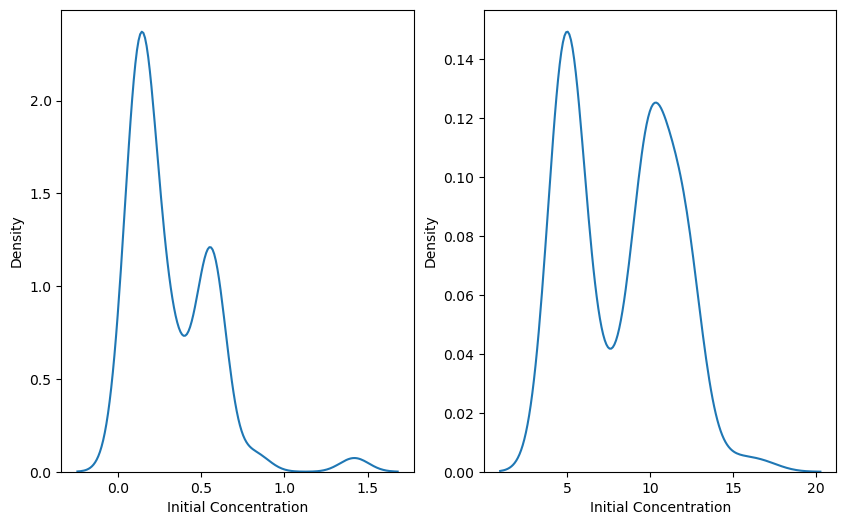

In [76]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.kdeplot(data_As["Initial Concentration"], ax = ax[0])
sns.kdeplot(data_F["Initial Concentration"], ax = ax[1])

### Both the datasets have bimodal distribution and hence we need to do something later!

## B) Initial pH

0.8975741239892183

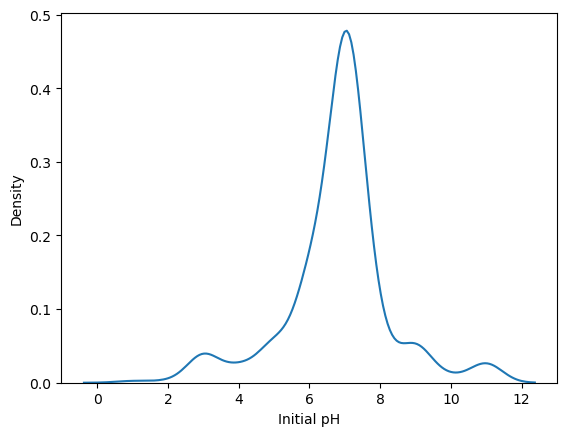

In [80]:
sns.kdeplot(data = df, x = "Initial pH")
((df["Initial pH"] >= 3) & (df["Initial pH"] <= 8)).sum()/len(df)

In [81]:
print("skewness of Initial pH is:", df["Initial pH"].skew())

skewness of Initial pH is: -0.29236001999800826


### As we can see, almost 90% values lie in the range 3 to 8
### Also, the distribution of this column is almost normal with a slight tendency to take more values on the higher side

### Is it the same for As and F individually? Let's find out

In [84]:
print("For Arsenic: ",((data_As["Initial pH"] >= 3) & (data_As["Initial pH"] <= 8)).sum()/len(data_As)*100)
print("For Fluoride: ", ((data_F["Initial pH"] >= 3) & (data_F["Initial pH"] <= 8)).sum()/len(data_F)*100)
print("skewness of Initial pH for arsenic only is:", data_As["Initial pH"].skew())
print("skewness of Initial pH for fluoride only is:", data_F["Initial pH"].skew())

For Arsenic:  91.44385026737967
For Fluoride:  88.04347826086956
skewness of Initial pH for arsenic only is: -0.3870499343457727
skewness of Initial pH for fluoride only is: -0.0743488205976264


Text(0.5, 1.0, 'Fluoride')

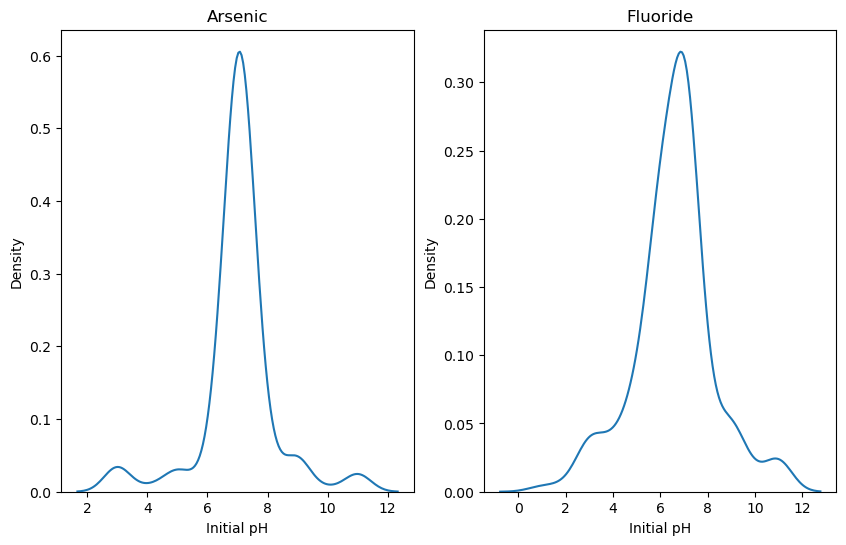

In [86]:
fig, ax = plt.subplots(1,2,figsize = (10,6))
sns.kdeplot(data_As["Initial pH"], ax = ax[0])
ax[0].set_title("Arsenic")
sns.kdeplot(data_F["Initial pH"], ax = ax[1])
ax[1].set_title("Fluoride")

### `Final Verdict` The data for arsenic is slightly more skewed than the original one but that for fluoride is highly normalised!

## C) Current

In [89]:
df["Current"].describe()

count    371.000000
mean       1.340344
std        1.756545
min        0.017000
25%        0.100000
50%        0.468750
75%        2.000000
max        8.400000
Name: Current, dtype: float64

<Axes: xlabel='Current', ylabel='Density'>

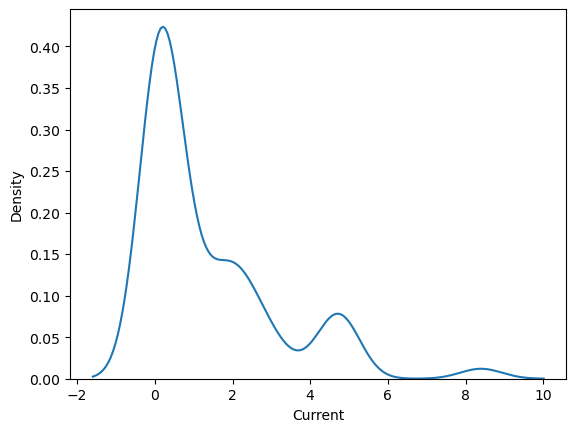

In [90]:
sns.kdeplot(df, x = "Current")

In [92]:
print("Skewness value of Current is:",df["Current"].skew())
print("Percentage of values less than 5 amps is:", (df["Current"] < 5).sum()/len(df)*100)

Skewness value of Current is: 1.7171828709082089
Percentage of values less than 5 amps is: 98.38274932614556


### More than 98% values of the current are less than 5 amps. Thus, the data of current is highly right skewed, which is evident from it's kdeplot as well as skewness value too.

<Axes: xlabel='Current'>

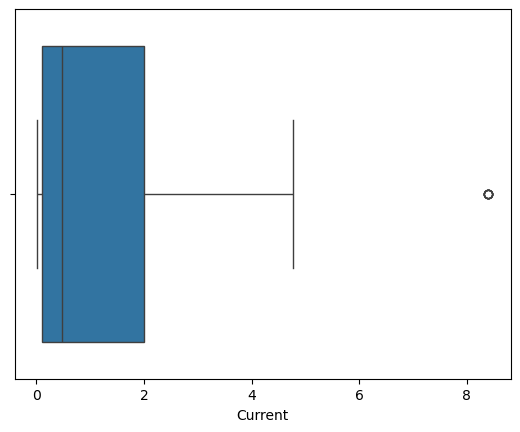

In [99]:
sns.boxplot(df, x = "Current")

In [100]:
# Checking how much data have current value above than 5 and whether it is genuine or not

df[df["Current"] > 5]

,Contaminant,Initial Concentration,Final Concentration,Removal-C-1,Initial pH,Current,Electrode Gap,Current Density,Residence Time,Reactor Volume,Electrode Material,Electrode Area
81,F,7.06,0.530206,92.49,1.0,8.4,0.5,100.0,30.0,2000,Al,840.0
82,F,7.06,0.429954,93.91,3.0,8.4,0.5,100.0,30.0,2000,Al,840.0
83,F,7.06,0.549974,92.21,5.0,8.4,0.5,100.0,30.0,2000,Al,840.0
84,F,7.06,0.569742,91.93,7.0,8.4,0.5,100.0,30.0,2000,Al,840.0
85,F,7.06,1.239736,82.44,9.0,8.4,0.5,100.0,30.0,2000,Al,840.0
86,F,7.06,3.049920,56.80,11.0,8.4,0.5,100.0,30.0,2000,Al,840.0


### Thus, we can see that in total there are 6 rows that have value of current higher than 5A.

### But is this the same for Arsenic and Fluoride?

In [104]:
print((data_As["Current"] < 3).sum()/len(data_As)*100)
print((data_F["Current"] < 7).sum()/len(data_F)*100)

97.32620320855615
96.73913043478261


### For Arsenic, most of the data is less than 3 amps whereas for Fluoride, it is less than 7 amps

## D) Electrode Gap

In [109]:
df["Electrode Gap"].describe()

count    371.000000
mean       1.751482
std        1.410028
min        0.500000
25%        1.000000
50%        1.300000
75%        2.000000
max       10.000000
Name: Electrode Gap, dtype: float64

<Axes: xlabel='Electrode Gap', ylabel='Density'>

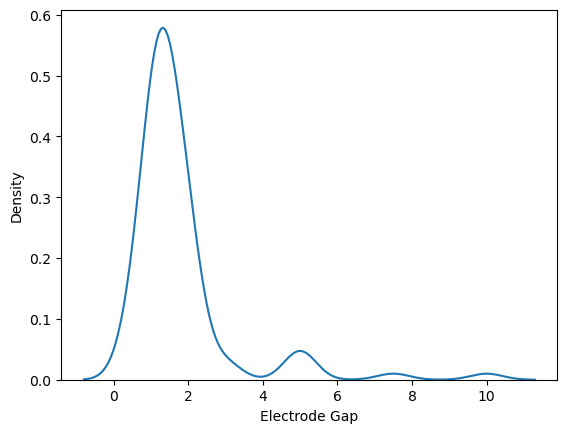

In [110]:
sns.kdeplot(df, x = "Electrode Gap")

In [113]:
print((df["Electrode Gap"] <= 5).sum()/len(df))

0.9784366576819407


### Most of the values are in the range of either 0-5

In [116]:
print((data_As["Electrode Gap"] < 5).sum()/len(data_As))
print((data_F["Electrode Gap"] < 6).sum()/len(data_F))

1.0
0.9565217391304348


<Axes: xlabel='Electrode Gap'>

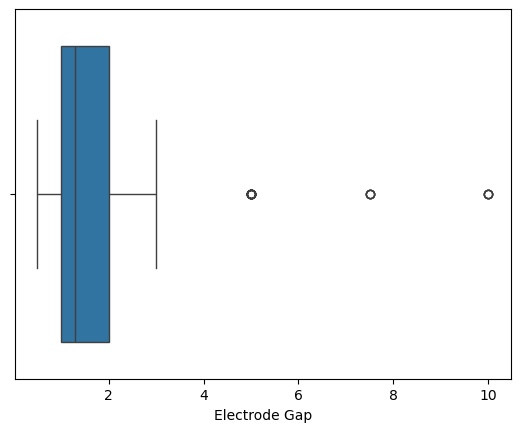

In [118]:
sns.boxplot(data = df, x = "Electrode Gap")

### For Arsenic, no value exceeds 5cm whereas for Fluorine, most of the values are less than 6cm.
### And No. of outliers are only 2.

## E) Reactor Volume

In [121]:
df["Reactor Volume"].describe()

count     371.000000
mean     1107.816712
std       699.189360
min       250.000000
25%       650.000000
50%      1000.000000
75%      1400.000000
max      5000.000000
Name: Reactor Volume, dtype: float64

Text(0.5, 1.0, 'Fluoride')

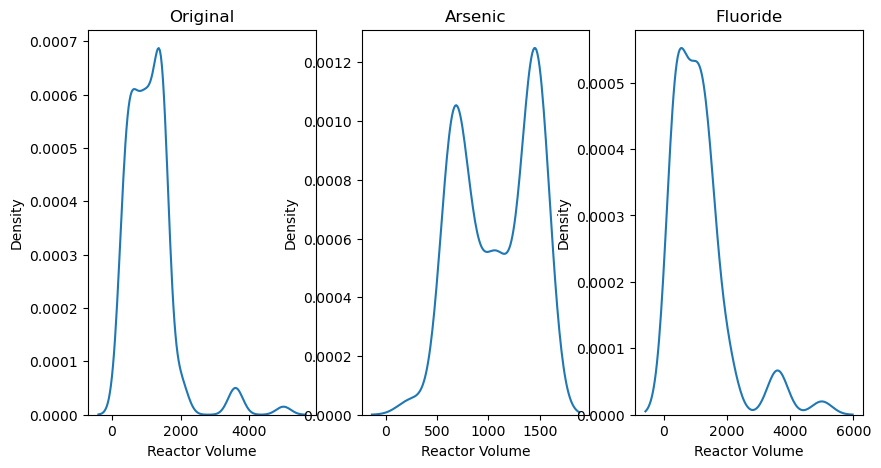

In [123]:
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
sns.kdeplot(df["Reactor Volume"], ax=ax[0])
ax[0].set_title('Original')
sns.kdeplot(data_As["Reactor Volume"], ax=ax[1])
ax[1].set_title('Arsenic')
sns.kdeplot(data_F["Reactor Volume"], ax=ax[2])
ax[2].set_title('Fluoride')


<Axes: xlabel='Reactor Volume'>

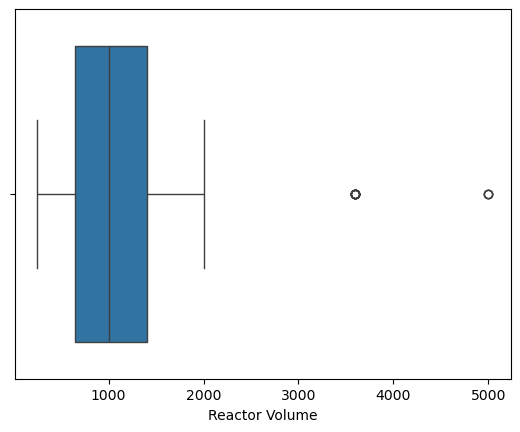

In [126]:
sns.boxplot(df, x = "Reactor Volume")

## F) Electrode Area

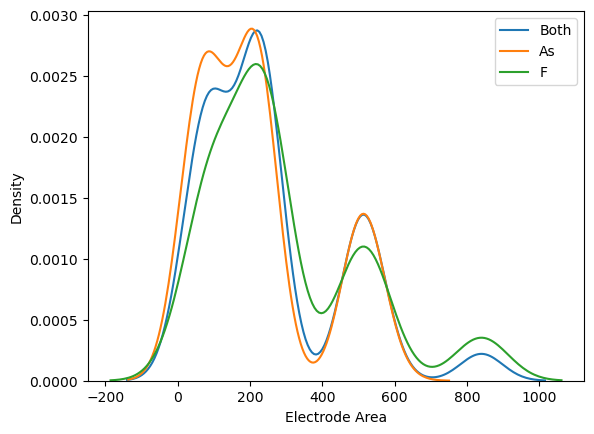

In [129]:
sns.kdeplot(df, x = "Electrode Area", label = "Both")
sns.kdeplot(data_As, x = "Electrode Area", label = "As")
sns.kdeplot(data_F, x = "Electrode Area", label = "F")
plt.legend()

<Axes: xlabel='Electrode Area'>

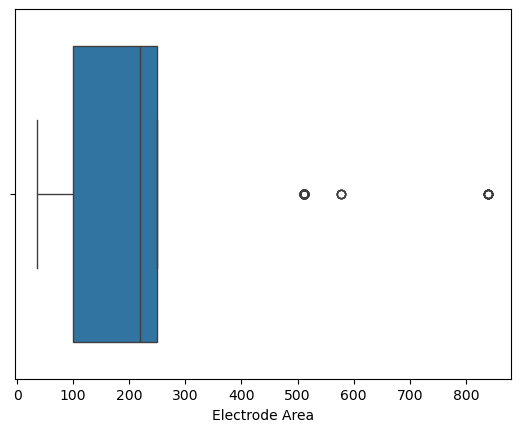

In [130]:
sns.boxplot(df, x = "Electrode Area")

### There are almost 10 outliers in the Electrode Area column

## G) Electrode Material

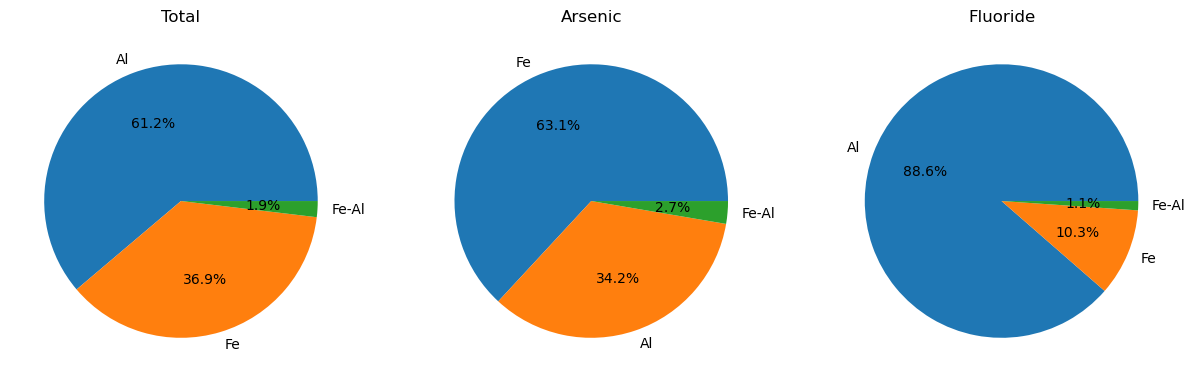

In [133]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,30))

ax[0].pie(df["Electrode Material"].value_counts(),labels = df["Electrode Material"].value_counts().index, autopct='%1.1f%%')
ax[0].set_title("Total")
ax[1].pie(data_As["Electrode Material"].value_counts(),labels = data_As["Electrode Material"].value_counts().index, autopct='%1.1f%%')
ax[1].set_title("Arsenic")
ax[2].pie(data_F["Electrode Material"].value_counts(),labels = data_F["Electrode Material"].value_counts().index, autopct='%1.1f%%')
ax[2].set_title("Fluoride")
plt.show()

### As we can see, the majority of the Material for As is Iron whereas for F, it is Aluminium. Double electrodes have very less amount of proportion tho.

---

## **6) Performing multivariate analysis**

### Plotting scatter plot of current and residence time with respect to other numerical columns

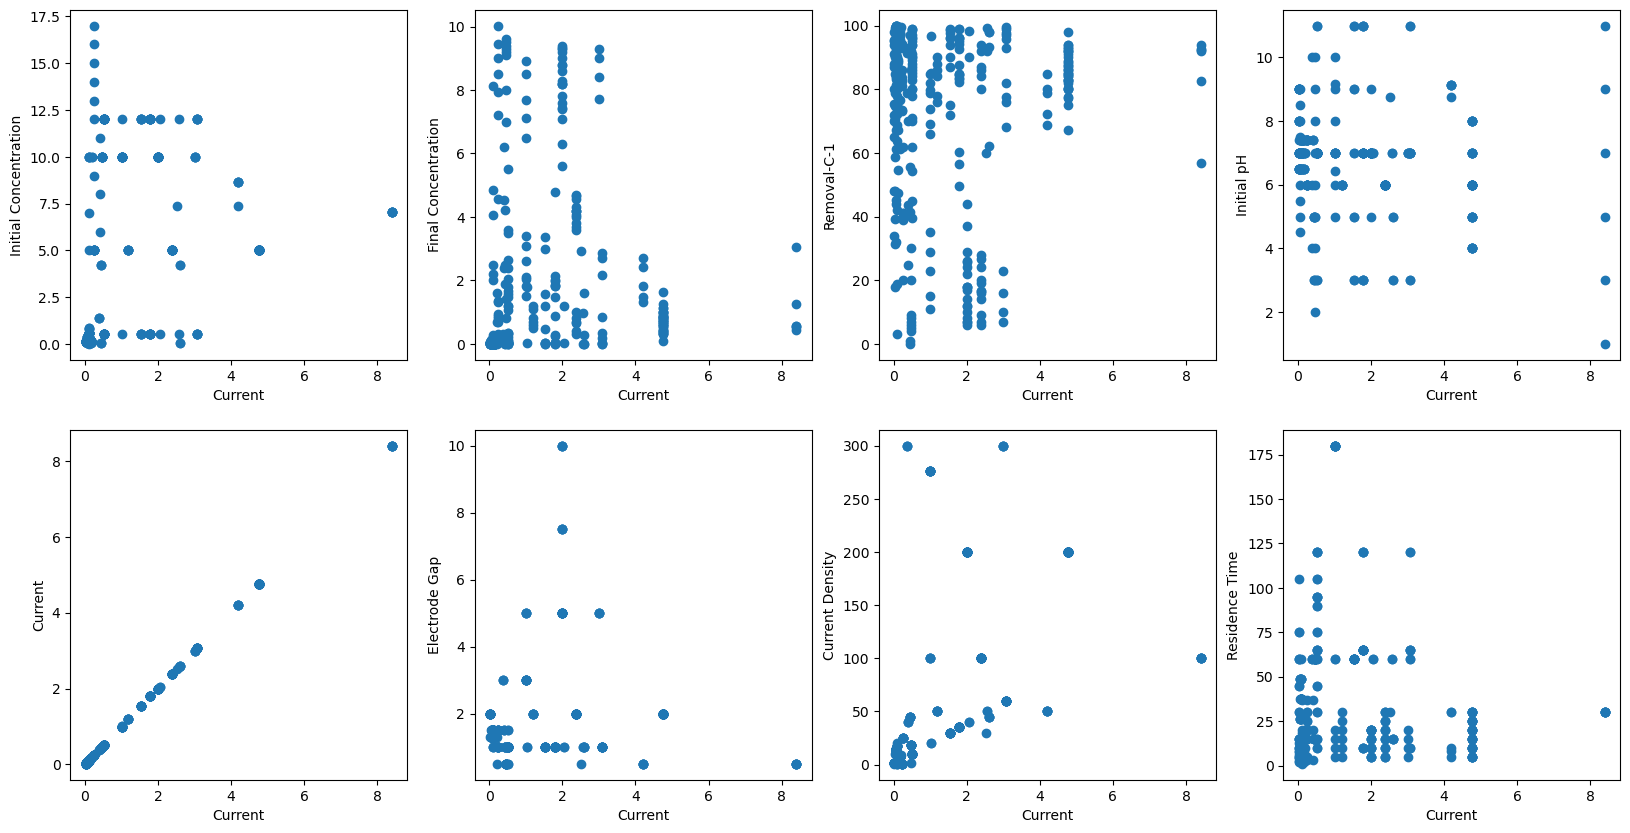

In [141]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))
cols = df.describe().columns
j = 0
for i in range(8):
    ax[int(i/4)][i%4].scatter(df["Current"], df[cols[i]])
    ax[int(i/4)][i%4].set_xlabel("Current")
    ax[int(i/4)][i%4].set_ylabel(cols[i])

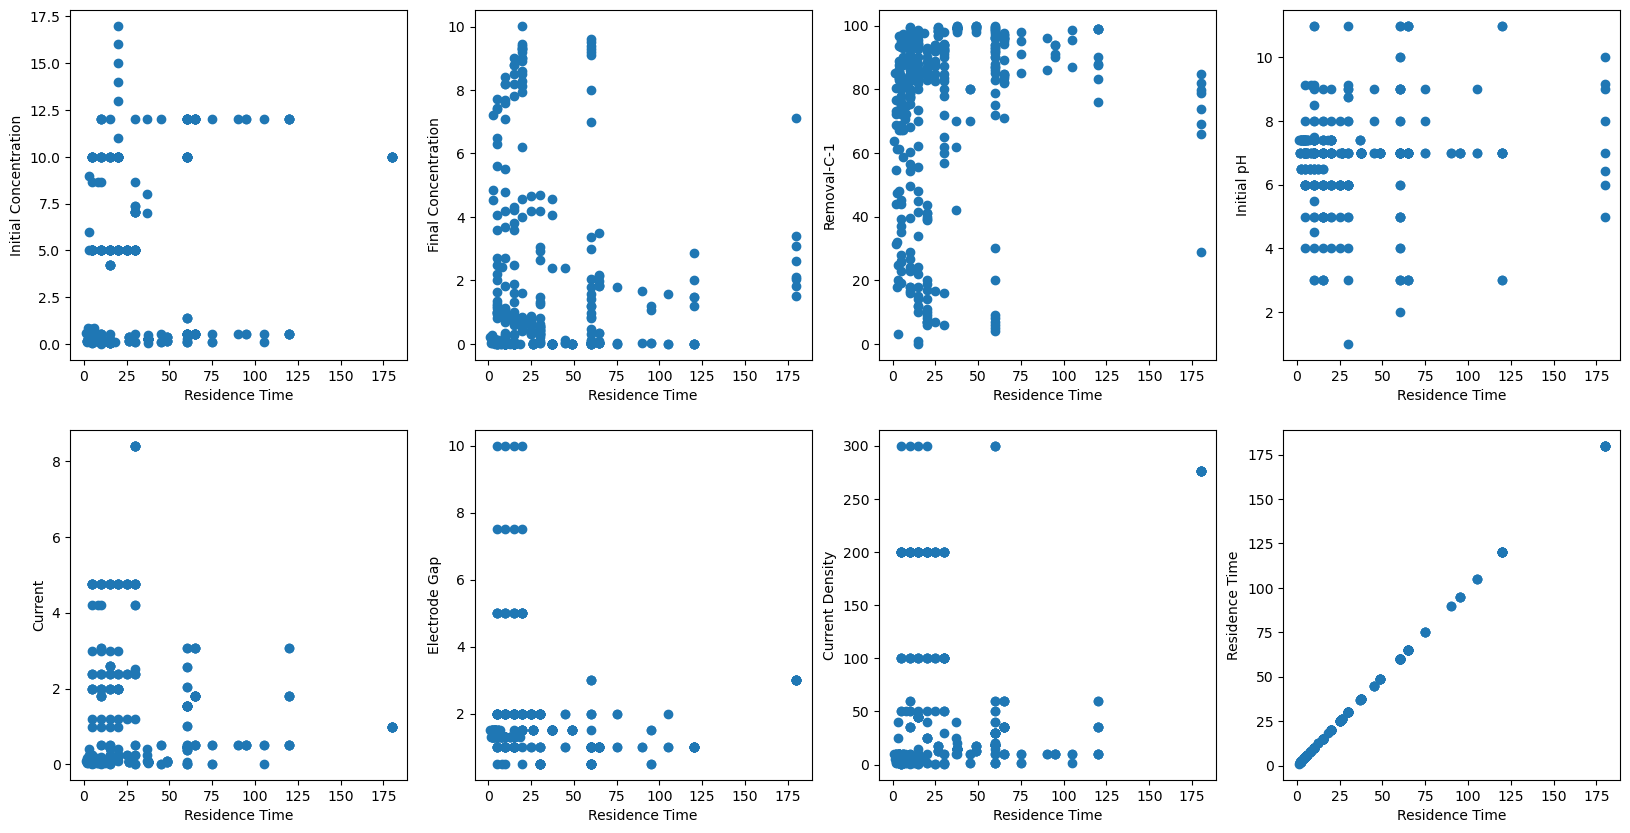

In [142]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (20,10))
cols = df.describe().columns
j = 0
for i in range(8):
    ax[int(i/4)][i%4].scatter(df["Residence Time"], df[cols[i]])
    ax[int(i/4)][i%4].set_xlabel("Residence Time")
    ax[int(i/4)][i%4].set_ylabel(cols[i])

### So we can see that these columns does not have any relation with each other and thus, their analysis does not give us any fruitful result.

---

---

# **Getting into the Machine Learning**

### First applying various Regression models such as Support Vector Machines, Linear Regression, Decision Trees, Random Forests, Gradient Boosting and XGBoost without any prior feature engineering or transformation and getting the r2 score by doing cross validation.

In [153]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [155]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "SVR": SVR(kernel='linear'),
    "Random Forest": RandomForestRegressor(n_estimators=500, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "XGBoost": XGBRegressor(n_estimators=500, random_state=42)
}

In [157]:
def evaluate(dataframe, target, models_ = models):
    X = dataframe.drop(columns = [target])
    y = dataframe[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    categorical = X_train.select_dtypes(include = ["object", "category"]).columns.tolist()
    numerical = X_train.select_dtypes(include = [np.number]).columns.tolist()
    ct = ColumnTransformer([
        ("ss", StandardScaler(), numerical),
        ("ohe", OneHotEncoder(drop = "first"), categorical)
    ])
    X_train = ct.fit_transform(X_train)
    X_test = ct.transform(X_test)
    results = {}
    for name, model in models_.items() :
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = r2_score(y_test, y_pred)
    return results

In [159]:
def evaluate_with_transformation(dataframe, target, models_ = models):
    X = dataframe.drop(columns = [target])
    y = np.array(dataframe[target])
    y = PowerTransformer(method="yeo-johnson").fit_transform(y.reshape(-1, 1)).ravel() 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    categorical = X_train.select_dtypes(include = ["object", "category"]).columns.tolist()
    numerical = X_train.select_dtypes(include = [np.number]).columns.tolist()
    ct = ColumnTransformer([
        ("ss", StandardScaler(), numerical),
        ("ohe", OneHotEncoder(drop = "first"), categorical)
    ])
    X_train = ct.fit_transform(X_train)
    X_test = ct.transform(X_test)
    results = {}
    for name, model in models_.items() :
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[name] = r2_score(y_test, y_pred)
    return results

In [163]:
evaluate(data_As, "Current")

{'Linear Regression': 0.7339612130284341,
 'Ridge Regression': 0.7369859818505743,
 'Lasso Regression': 0.8385931828604344,
 'SVR': 0.7369228765036628,
 'Random Forest': 0.9608986665295707,
 'Decision Tree': 0.9643607745819927,
 'XGBoost': 0.9651573527919213}

In [165]:
results = pd.DataFrame(index = list(models.keys()))
results["As_Current"] = list(evaluate(data_As, "Current").values())
results["As_Residence_Time"] = list(evaluate(data_As, "Residence Time").values())
results["F_Current"] = list(evaluate(data_F, "Current").values())
results["F_Residence_Time"] = list(evaluate(data_F, "Residence Time").values())

In [166]:
results

,As_Current,As_Residence_Time,F_Current,F_Residence_Time
Linear Regression,0.733961,0.536450,0.818471,0.798933
Ridge Regression,0.736986,0.499423,0.820459,0.798258
Lasso Regression,0.838593,0.533732,0.801698,0.799495
SVR,0.736923,0.610210,0.822240,0.403393
Random Forest,0.960899,0.766546,0.976849,0.910952
Decision Tree,0.964361,0.363536,0.982420,0.711472
XGBoost,0.965157,0.647810,0.847298,0.803227


---